# 6 梯度下降法

不是一个机器学习算法，是一种基于搜索的最优化方法，作用：最小化一个损失函数
梯度上升法：最大化一个效用函数

Δx := - η * dJ/dx ,学习率的设定很重要，有的损失函数找不到极值点，存在局部最优解的问题

解决方案：多次运行，随机化初始点；初始点的位置也是个超参数

线性回归法的损失函数有唯一最优解

## 6-1 梯度下降法模拟

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

In [3]:
plot_x = np.linspace(-1, 6, 141)
plot_x

array([-1.  , -0.95, -0.9 , -0.85, -0.8 , -0.75, -0.7 , -0.65, -0.6 ,
       -0.55, -0.5 , -0.45, -0.4 , -0.35, -0.3 , -0.25, -0.2 , -0.15,
       -0.1 , -0.05,  0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,
        0.35,  0.4 ,  0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,
        0.8 ,  0.85,  0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,
        1.25,  1.3 ,  1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,
        1.7 ,  1.75,  1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,
        2.15,  2.2 ,  2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,
        2.6 ,  2.65,  2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,
        3.05,  3.1 ,  3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,
        3.5 ,  3.55,  3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,
        3.95,  4.  ,  4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,
        4.4 ,  4.45,  4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,
        4.85,  4.9 ,  4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,
        5.3 ,  5.35,

In [4]:
plot_y = (plot_x - 2.5)**2 - 1

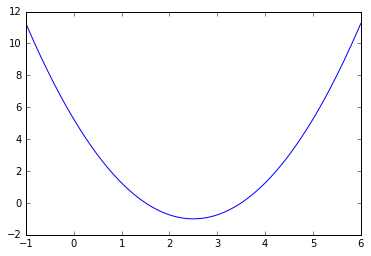

In [9]:
plt.plot(plot_x, plot_y)

In [10]:
def dJ(theta):
    return 2*(theta - 2.5)

In [11]:
def J(theta):
    return (theta - 2.5)**2 - 1

In [12]:
eta = 0.1
epsilon = 1e-8
theta = 0.0
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    
    if (abs(J(theta) - J(last_theta))) < epsilon:
        break
        
print(theta)
print(J(theta))

2.499891109642585
-0.99999998814289


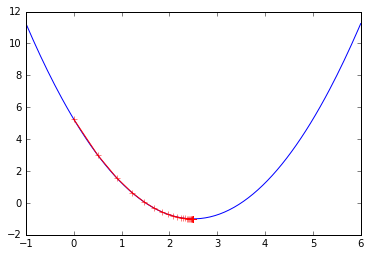

In [18]:
eta = 0.1
epsilon = 1e-8
theta = 0.0

theta_history = [theta]
while True:
    gradient = dJ(theta)
    last_theta = theta
    theta = theta - eta * gradient
    theta_history.append(theta)
    
    if (abs(J(theta) - J(last_theta))) < epsilon:
        break
        
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)), color='r',  marker='+')

In [19]:
len(theta_history)

46

In [20]:
def gradient_descent(initial_theta, eta, spsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    
    while True:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if (abs(J(theta) - J(last_theta))) < epsilon:
            break
            
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)), color='r',  marker='+')
    plt.show()

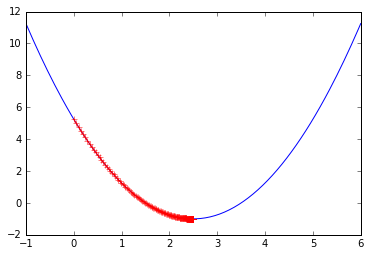

In [21]:
eta = 0.01
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [22]:
len(theta_history)

424

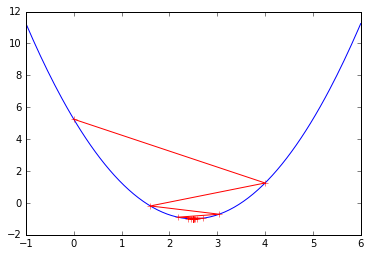

In [23]:
eta = 0.8
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

In [24]:
eta = 1.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

OverflowError: (34, 'Result too large')

In [25]:
def J(theta):
    try:
        return 
    except:
        return float('inf')

In [26]:
def gradient_descent(initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    theta_history.append(initial_theta)
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if (abs(J(theta) - J(last_theta))) < epsilon:
            break
            
        i_iter +=1
        
def plot_theta_history():
    plt.plot(plot_x, J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)), color='r',  marker='+')
    plt.show()

In [27]:
eta = 1.1
theta_history = []
gradient_descent(0., eta)
plot_theta_history()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

## 6-2 多元线性回归中的梯度下降法
梯度代表方向，对应J上升最快的方向

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
np.random.seed = 666
x = 2 * np.random.random(size=100)
y = x *3. + 4. + np.random.normal(size=100)

In [34]:
X = x.reshape(-1, 1)

In [35]:
X.shape

(100, 1)

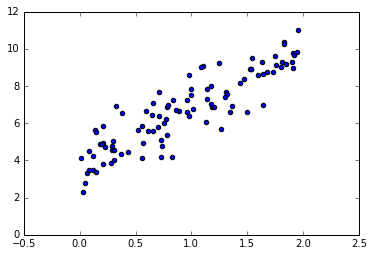

In [36]:
plt.scatter(x, y)

In [37]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta))**2) / len(X_b)
    except:
        return float('inf')

In [39]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1,len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

In [51]:
def gradient_descent(X_b, y, initial_theta, eta, n_iters = 1e4, epsilon=1e-8):
    theta = initial_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        theta_history.append(theta)

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y))) < epsilon:
            break
            
        i_iter +=1
    return theta

In [52]:
X_b = np.hstack([np.ones((len(X), 1)) ,X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

theta = gradient_descent(X_b, y, initial_theta, eta)

In [53]:
theta

array([3.84509051, 3.04023587])

### 测试封装好的梯度下降线性回归

In [54]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_gd(X, y)

LinearRegression()

In [55]:
lin_reg.coef_

array([3.04023587])

In [56]:
lin_reg.intercept_

3.845090507645068

** 在计算梯度的时候，梯度的表达式可以向量化表示 **

In [1]:
import numpy as np
from sklearn import datasets

In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
from playML.my_model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,seed = 666)

In [4]:
from playML.LinearRegression import LinearRegression

lin_reg1 = LinearRegression()
%time lin_reg1.fit_normal(X_train, y_train)
lin_reg1.score(X_test, y_test)

Wall time: 1 ms


0.81298026026586

In [5]:
lin_reg2 = LinearRegression()
%time lin_reg2.fit_gd(X_train, y_train)
lin_reg2.score(X_test, y_test)

C:\Program Files\Anaconda3\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
C:\Users\yyy\Documents\playML\LinearRegression.py:40: RuntimeWarning: overflow encountered in square
  return np.sum((y - X_b.dot(theta))**2) / len(y)
C:\Users\yyy\Documents\playML\LinearRegression.py:61: RuntimeWarning: invalid value encountered in double_scalars
  if (abs(J(theta, X_b,y) - J(last_theta, X_b,y)) <epsilon):


Wall time: 330 ms


nan

**此时报错，warning**

In [6]:
X_train[:10]

array([[1.42362e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        6.34300e+00, 1.00000e+02, 1.57410e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 2.03200e+01],
       [3.67822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.70000e-01,
        5.36200e+00, 9.62000e+01, 2.10360e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.80790e+02, 1.01900e+01],
       [1.04690e-01, 4.00000e+01, 6.41000e+00, 1.00000e+00, 4.47000e-01,
        7.26700e+00, 4.90000e+01, 4.78720e+00, 4.00000e+00, 2.54000e+02,
        1.76000e+01, 3.89250e+02, 6.05000e+00],
       [1.15172e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        5.70100e+00, 9.50000e+01, 3.78720e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.58770e+02, 1.83500e+01],
       [6.58800e-02, 0.00000e+00, 2.46000e+00, 0.00000e+00, 4.88000e-01,
        7.76500e+00, 8.33000e+01, 2.74100e+00, 3.00000e+00, 1.93000e+02,
        1.78000e+01, 3.95560e+02, 7.56000e+00],
       [2.49800e-02, 0.00000e+

In [6]:
lin_reg2 = LinearRegression()
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

Wall time: 322 ms


LinearRegression()

In [10]:
lin_reg2.score(X_test, y_test)

0.27556634853389195

In [11]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

Wall time: 28.7 s


LinearRegression()

In [13]:
lin_reg2.score(X_test, y_test)

0.7541852353980762

**梯度下降法使用中，各个属性的取值差异很大，步长设置得不合理就会得不到最优解，将步长设很小可以，或者数据归一化**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std = StandardScaler()
std.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
X_train_std = std.transform(X_train)

In [17]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_std, y_train)

Wall time: 148 ms


LinearRegression()

In [19]:
X_test_std = std.transform(X_test)
lin_reg3.score(X_test_std, y_test)

0.8129880620122235

### 梯度下降法的优势

In [21]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m,n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:]) + true_theta[0] + np.random.normal(0., 10.,size=m)#均值0，标准差10

In [22]:
big_reg1 = LinearRegression()
%time big_reg1.fit_normal(big_X, big_y)

Wall time: 4.91 s


LinearRegression()

In [23]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

Wall time: 3.83 s


LinearRegression()

数据规模大的时候，用正规方程组求解用到大量乘积，反而不如搜索法快，梯度下降法搜索过程中，用到了每个样本求梯度，为了加快可以用随机梯度下降法

## 随机梯度下降法
学习率变得很重要，逐渐变小

η = a / (i_iter + b),模拟退火的思想，经验a=5，b=50

In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
m = 10000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4. * x + np.random.normal(0,3,size=m)

In [32]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(y)
    except:
        return float('inf')
    
def dJ(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) *2. / len(y)

def gradient_descent(X_b, y, initial_theta, eta, n_iters=1e4, epsilon=1e-8):
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y))) < epsilon:
            break
            
        cur_iter +=1
    return theta

In [33]:
%%time

X_b = np.hstack([np.ones((len(X),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b, y, initial_theta, eta)

Wall time: 169 ms


In [34]:
theta

array([-0.00924269,  4.0079585 ])

### 随机梯度下降法测试

In [35]:
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i) *2.

In [36]:
def sgd(X_b,y, initial_theta, n_iters):
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0 / (t + t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [37]:
%%time
X_b = np.hstack([np.ones((len(X), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)

Wall time: 38.6 ms


In [38]:
theta

array([-0.20794781,  4.0179448 ])

## 6-7 sklearn中的sgd

### 使用自己的sgd

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
m = 10000

x = np.random.normal(size=m)
X = x.reshape(-1,1)
y = 4. * x + 3. + np.random.normal(0,3,size=m)

In [3]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit_sgd(X, y, n_iters=2)

LinearRegression()

In [4]:
lin_reg.coef_

array([3.93952877])

In [5]:
lin_reg.intercept_

2.9898482301041867

### 真实数据使用自己sgd

导入数据

In [6]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [8]:
from playML.my_model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, seed=666)

数据归一化

In [9]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)
X_train_std = std.transform(X_train)
X_test_std = std.transform(X_test)

In [10]:
from playML.LinearRegression import LinearRegression

lin_reg = LinearRegression()
%time lin_reg.fit_sgd(X_train_std, y_train, n_iters=2)
lin_reg.score(X_test_std, y_test)

Wall time: 6.05 ms


0.7865171620468299

fit_sgd中的参数n_iters是遍历轮数，最好的拟合得分是0.81，增加遍历轮数进行实验

In [11]:
%time lin_reg.fit_sgd(X_train_std, y_train, n_iters=50)
lin_reg.score(X_test_std, y_test)

Wall time: 109 ms


0.8085728716573836

In [12]:
%time lin_reg.fit_sgd(X_train_std, y_train, n_iters=100)
lin_reg.score(X_test_std, y_test)

Wall time: 208 ms


0.8129484613272351

### sklearn中的sgd

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
%time sgd_reg.fit(X_train_std, y_train)
sgd_reg.score(X_test_std,y_test)

Wall time: 3.46 ms


C:\Program Files\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.8047845970157302

## 6-8 如何确定梯度计算的准确性，调试梯度下降法

以上的梯度是通过数学公式计算出来的，实际情况中可能不适用，可以通过离散化的差值除间距近似

### 如何调试梯度

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
np.random.seed(666)
X = np.random.random(size=(1000, 10))

In [16]:
true_theta = np.arange(1, 12, dtype=float)

In [17]:
X_b = np.hstack([np.ones((len(X), 1)), X])
y = X_b.dot(true_theta) + np.random.normal(size=1000)

In [18]:
X.shape

(1000, 10)

In [19]:
y.shape

(1000,)

In [20]:
true_theta

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [21]:
def J(theta, X_b, y):
    try:
        return np.sum((y - X_b.dot(theta)) ** 2) / len(X_b)
    except:
        return float('inf')

In [22]:
def dJ_math(theta, X_b, y):
    return X_b.T.dot(X_b.dot(theta) - y) * 2 / len(y)

In [30]:
def dJ_debug(theta, X_b, y, epsilon=0.01):
    res = np.empty(len(theta))
    for i in range(len(theta)):
        theta_1 = theta.copy()
        theta_1[i] += epsilon
        theta_2 = theta.copy()
        theta_2[i] -= epsilon
        res[i] = (J(theta_1, X_b, y) - J(theta_2, X_b, y)) / (2 * epsilon)
    return res

In [31]:
def gradient_descent(dJ, X_b, y, initial_theta, eta, n_iters = 1e4,epsilon=1e-8):
    
    theta = initial_theta
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient

        if (abs(J(theta, X_b, y) - J(last_theta, X_b, y))) < epsilon:
            break
            
        cur_iter +=1
        
    return theta

In [32]:
X_b = np.hstack([np.ones((len(X_b), 1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01

%time theta = gradient_descent(dJ_debug, X_b, y, initial_theta,eta)
theta

Wall time: 16 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

In [33]:
%time theta = gradient_descent(dJ_math, X_b, y, initial_theta,eta)
theta

Wall time: 2.37 s


array([ 1.1251597 ,  2.05312521,  2.91522497,  4.11895968,  5.05002117,
        5.90494046,  6.97383745,  8.00088367,  8.86213468,  9.98608331,
       10.90529198])

- **说明，dJ_debug可以来求梯度，但是比较慢**；
- **可以用debug求得的theta来验证数学解的公式是否正确**

## 6-9 有关梯度下降法的更多讨论

* 批量梯度下降法
* 随机梯度下降法
* 小批量梯度下降法

**随机梯度下降的优点**

- 跳出局部最优解
- 更快的运行速度
- 机器学习领域很多算法都要使用随机的特点